# Classification des données Cancer_Wisconsin par Keras

## Environnement

In [1]:
from pandas import read_csv, melt
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical, np_utils
from keras.models import Sequential
from keras.layers import Dense
from keras import Input, Model
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

## Les données

### Import

In [2]:
data = read_csv("/home/noura/Projets/Keras_Cancer_Wisconsin/Datas/wdbc.data", 
                names = ['id', 'diagnosis', 'radius_mean', 'texture_mean', 
                   'perimeter_mean','area_mean','smoothness_mean', 'compactness_mean', 
                   'concavity_mean','concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean', 
                   'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 
                   'concavity_se', 'concave_points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 
                   'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst',
                   'concavity_worst', 'concave_points_worst', 'symmetry_worst', 'fractal_dimension_worst'])

### Exploration

In [3]:
data.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


In [4]:
data.shape # vérification des dimensions

(569, 32)

In [5]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [6]:
repartition = data.groupby('diagnosis').size()
repartition

diagnosis
B    357
M    212
dtype: int64

In [7]:
print('ratio : {:.2f}'.format(repartition['B']/repartition['M']))

ratio : 1.68


In [ ]:
Après calcul du ratio, le déséquilibre est négligeable

### Vérifier les données

In [8]:
output_verif = data.applymap(np.isreal).all(0)
output_verif

id                          True
diagnosis                  False
radius_mean                 True
texture_mean                True
perimeter_mean              True
area_mean                   True
smoothness_mean             True
compactness_mean            True
concavity_mean              True
concave_points_mean         True
symmetry_mean               True
fractal_dimension_mean      True
radius_se                   True
texture_se                  True
perimeter_se                True
area_se                     True
smoothness_se               True
compactness_se              True
concavity_se                True
concave_points_se           True
symmetry_se                 True
fractal_dimension_se        True
radius_worst                True
texture_worst               True
perimeter_worst             True
area_worst                  True
smoothness_worst            True
compactness_worst           True
concavity_worst             True
concave_points_worst        True
symmetry_w

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave_points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

### Visualisation graphique

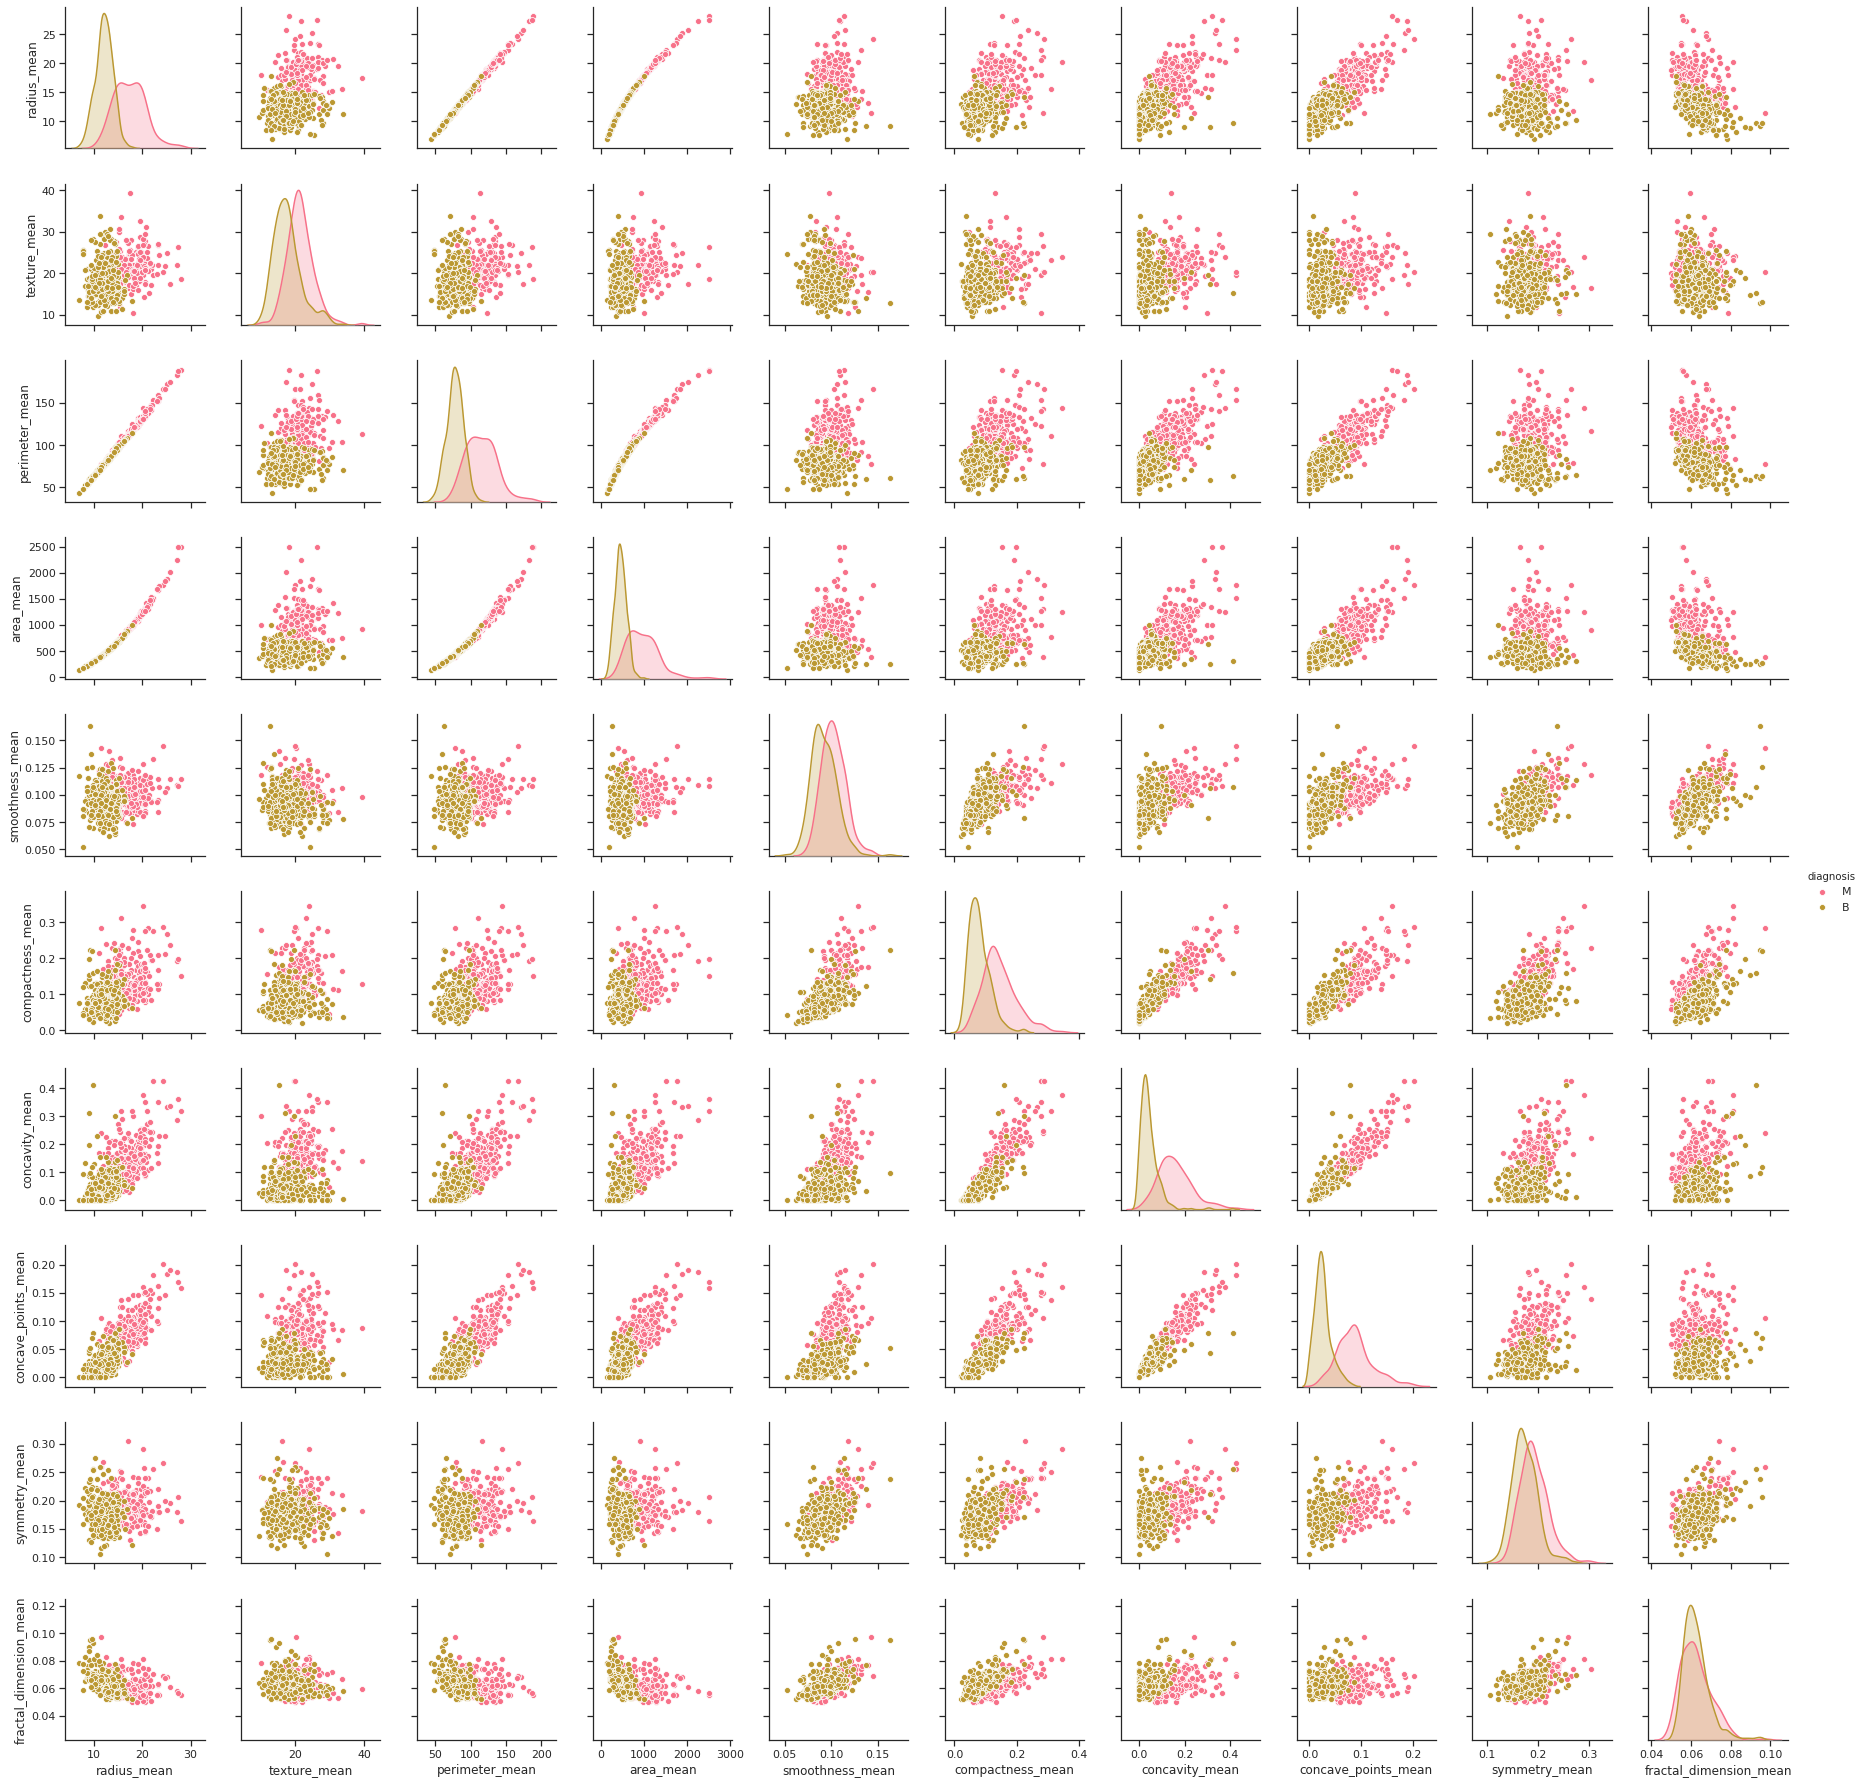

In [10]:
sns.set(style = "ticks")
sns.set_palette("husl")
sns.pairplot(data.loc[:,'diagnosis':'fractal_dimension_mean'], hue="diagnosis")
# Afin d'y voir quelque chose, seules les moyennes sont représentées

In [11]:
#Représentation en violin plot, avec normalisation des données au préalable.
data_norm = data
for i in data_norm.iloc[:,2:30] :
    data_norm[i] = (data_norm[i]-data_norm[i].mean())/data_norm[i].std()
data_norm.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,1.096100,-2.071512,1.268817,0.983510,1.567087,3.280628,2.650542,2.530249,...,1.885031,-1.358098,2.301575,1.999478,1.306537,2.614365,2.107672,2.294058,0.4601,0.11890
1,842517,M,1.828212,-0.353322,1.684473,1.907030,-0.826235,-0.486643,-0.023825,0.547662,...,1.804340,-0.368879,1.533776,1.888827,-0.375282,-0.430066,-0.146620,1.086129,0.2750,0.08902
2,84300903,M,1.578499,0.455786,1.565126,1.557513,0.941382,1.052000,1.362280,2.035440,...,1.510541,-0.023953,1.346291,1.455004,0.526944,1.081980,0.854222,1.953282,0.3613,0.08758
3,84348301,M,-0.768233,0.253509,-0.592166,-0.763792,3.280667,3.399917,1.914213,1.450431,...,-0.281217,0.133866,-0.249720,-0.549538,3.391291,3.889975,1.987839,2.173873,0.6638,0.17300
4,84358402,M,1.748758,-1.150804,1.775011,1.824624,0.280125,0.538866,1.369806,1.427237,...,1.297434,-1.465481,1.337363,1.219651,0.220362,-0.313119,0.612640,0.728618,0.2364,0.07678


In [12]:
#Stockage en dataframe
data_norm_tab = melt(data_norm,id_vars = "diagnosis",value_vars = ['radius_mean', 'texture_mean', 
                   'perimeter_mean','area_mean','smoothness_mean', 'compactness_mean', 
                   'concavity_mean','concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean', 
                   'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 
                   'concavity_se', 'concave_points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 
                   'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst',
                   'concavity_worst', 'concave_points_worst', 'symmetry_worst', 'fractal_dimension_worst'])
data_norm_tab.head()

,diagnosis,variable,value
0,M,radius_mean,1.096100
1,M,radius_mean,1.828212
2,M,radius_mean,1.578499
3,M,radius_mean,-0.768233
4,M,radius_mean,1.748758


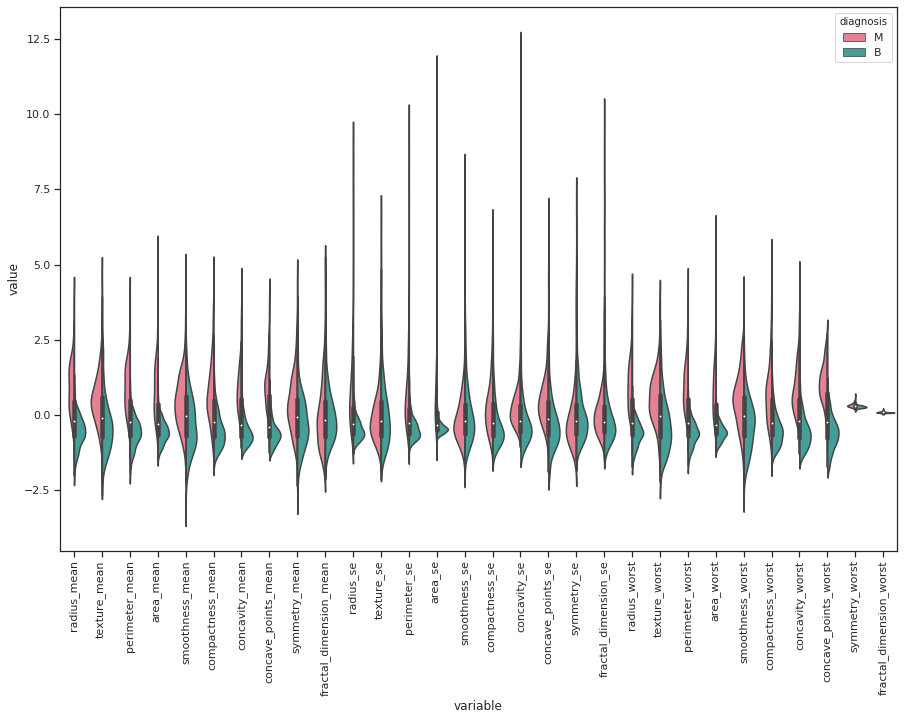

In [13]:
#Violin plot
plt.figure(figsize = (15,10))
sns.violinplot(x = "variable", y = "value", hue="diagnosis",data= data_norm_tab, split = True, palette = "husl")
plt.xticks(rotation=90)
plt.show()

## Mise en place du modele

### Préparation des données

In [14]:
#Définition de X : attention X est un numpy
X = data[['radius_mean', 'texture_mean', 'perimeter_mean','area_mean','smoothness_mean', 'compactness_mean',
          'concavity_mean','concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
          'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se',
          'concavity_se', 'concave_points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst',
          'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst',
          'concavity_worst', 'concave_points_worst', 'symmetry_worst', 'fractal_dimension_worst']].to_numpy()
X.shape

(569, 30)

In [15]:
#Définition de Y
Y = data[['diagnosis']]
Y.shape

(569, 1)

In [17]:
encoder = LabelEncoder()
Y_encod = encoder.fit_transform(Y) #le statut est encodé en integer
Y_onehot = np_utils.to_categorical(Y_encod) #Y est trié selon les catégories càd selon les 2 sorties attendues

In [18]:
Y_onehot.shape

(569, 2)

In [21]:
Y_onehot[:6,:]

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

### Le modèle

In [22]:
#choix d'un modèle séquentiel
model = Sequential()
model.add(Dense(10, input_dim=30, activation="sigmoid"))
model.add(Dense(4, activation="sigmoid"))
#dernière couche dense : le nbre de neuronnes doit correspondre aux nombres de catégories en output
model.add(Dense(2, activation="sigmoid"))

In [23]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                310       
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 44        
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 10        
Total params: 364
Trainable params: 364
Non-trainable params: 0
_________________________________________________________________
None


## Compilations et résultats sur données non normalisées

### Sur l'ensemble des données

In [24]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
#Il y a seulement 2 ouputs, on choisit donc une focntion loss de type binary_crossentropy

In [25]:
history = model.fit(X, Y_onehot, epochs=150, batch_size=10,verbose=1, validation_split=0.1)

Epoch 1/150
52/52 [==============================] - 0s 3ms/step - loss: 0.6518 - accuracy: 0.8574 - val_loss: 0.6154 - val_accuracy: 0.9649
Epoch 2/150
52/52 [==============================] - 0s 1ms/step - loss: 0.5961 - accuracy: 0.9297 - val_loss: 0.5592 - val_accuracy: 0.9649
Epoch 3/150
52/52 [==============================] - 0s 1ms/step - loss: 0.5537 - accuracy: 0.9316 - val_loss: 0.5153 - val_accuracy: 0.9649
Epoch 4/150
52/52 [==============================] - 0s 949us/step - loss: 0.5144 - accuracy: 0.9375 - val_loss: 0.4756 - val_accuracy: 0.9649
Epoch 5/150
52/52 [==============================] - 0s 1ms/step - loss: 0.4768 - accuracy: 0.9434 - val_loss: 0.4374 - val_accuracy: 0.9649
Epoch 6/150
52/52 [==============================] - 0s 1ms/step - loss: 0.4400 - accuracy: 0.9473 - val_loss: 0.4048 - val_accuracy: 0.9825
Epoch 7/150
52/52 [==============================] - 0s 2ms/step - loss: 0.4050 - accuracy: 0.9531 - val_loss: 0.3716 - val_accuracy: 0.9825
Epoch 8/150

Epoch 59/150
52/52 [==============================] - 0s 2ms/step - loss: 0.0650 - accuracy: 0.9883 - val_loss: 0.0844 - val_accuracy: 0.9825
Epoch 60/150
52/52 [==============================] - 0s 2ms/step - loss: 0.0640 - accuracy: 0.9883 - val_loss: 0.0854 - val_accuracy: 0.9825
Epoch 61/150
52/52 [==============================] - 0s 2ms/step - loss: 0.0633 - accuracy: 0.9883 - val_loss: 0.0851 - val_accuracy: 0.9825
Epoch 62/150
52/52 [==============================] - 0s 1ms/step - loss: 0.0626 - accuracy: 0.9863 - val_loss: 0.0867 - val_accuracy: 0.9825
Epoch 63/150
52/52 [==============================] - 0s 2ms/step - loss: 0.0618 - accuracy: 0.9883 - val_loss: 0.0861 - val_accuracy: 0.9825
Epoch 64/150
52/52 [==============================] - 0s 1ms/step - loss: 0.0610 - accuracy: 0.9883 - val_loss: 0.0849 - val_accuracy: 0.9825
Epoch 65/150
52/52 [==============================] - 0s 1ms/step - loss: 0.0604 - accuracy: 0.9883 - val_loss: 0.0858 - val_accuracy: 0.9825
Epoch 

52/52 [==============================] - 0s 937us/step - loss: 0.0373 - accuracy: 0.9922 - val_loss: 0.0990 - val_accuracy: 0.9649
Epoch 117/150
52/52 [==============================] - 0s 1ms/step - loss: 0.0372 - accuracy: 0.9922 - val_loss: 0.0976 - val_accuracy: 0.9649
Epoch 118/150
52/52 [==============================] - 0s 941us/step - loss: 0.0370 - accuracy: 0.9922 - val_loss: 0.0937 - val_accuracy: 0.9649
Epoch 119/150
52/52 [==============================] - 0s 922us/step - loss: 0.0365 - accuracy: 0.9922 - val_loss: 0.0973 - val_accuracy: 0.9649
Epoch 120/150
52/52 [==============================] - 0s 954us/step - loss: 0.0366 - accuracy: 0.9922 - val_loss: 0.0983 - val_accuracy: 0.9649
Epoch 121/150
52/52 [==============================] - 0s 1ms/step - loss: 0.0360 - accuracy: 0.9922 - val_loss: 0.0963 - val_accuracy: 0.9649
Epoch 122/150
52/52 [==============================] - 0s 1ms/step - loss: 0.0359 - accuracy: 0.9922 - val_loss: 0.0944 - val_accuracy: 0.9649
Epoch

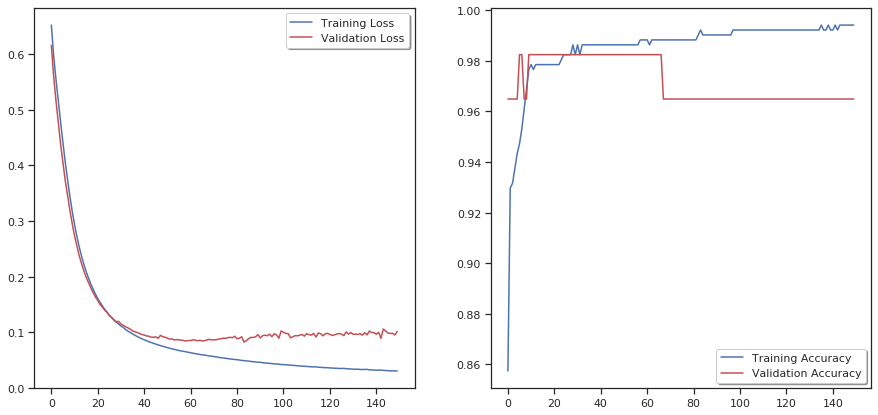

In [26]:
#Représentation graphiques des performances du modèle
plt.figure(figsize=(15,7))
ax1 = plt.subplot(1,2,1)
ax1.plot(history.history['loss'], color='b', label='Training Loss') 
ax1.plot(history.history['val_loss'], color='r', label = 'Validation Loss',axes=ax1)
legend = ax1.legend(loc='best', shadow=True)
ax2 = plt.subplot(1,2,2)
ax2.plot(history.history['accuracy'], color='b', label='Training Accuracy') 
ax2.plot(history.history['val_accuracy'], color='r', label = 'Validation Accuracy')
legend = ax2.legend(loc='best', shadow=True)

In [27]:
#Evaluation
eval = model.evaluate(X,Y_onehot)

18/18 [==============================] - 0s 659us/step - loss: 0.0372 - accuracy: 0.9912


In [28]:
print("Accuracy: %.1f" % (eval[1]*100))
print("Loss: %.1f" % (eval[0]*100))

Accuracy: 99.1
Loss: 3.7


In [29]:
#Prédiction
prediction = model.predict(X)
for i in range(20):
    print(prediction[i])

[0.00277105 0.9974009 ]
[0.0027743 0.9973979]
[0.00277326 0.99739885]
[0.00303981 0.99714065]
[0.00281793 0.9973562 ]
[0.0030179  0.99716187]
[0.00277203 0.99740005]
[0.00286564 0.9973098 ]
[0.00279409 0.99737865]
[0.00278574 0.99738663]
[0.00378752 0.9964268 ]
[0.00279474 0.9973781 ]
[0.01843101 0.98232234]
[0.10880959 0.89315474]
[0.00303259 0.99714875]
[0.00277272 0.99739933]
[0.00279549 0.9973774 ]
[0.00277138 0.9974005 ]
[0.00277096 0.997401  ]
[0.98854345 0.01109114]


### Séparer le jeux de données : Apprentissage et validation

In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y_onehot, test_size = 0.2, random_state=123)

In [31]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(455, 30)
(114, 30)
(455, 2)
(114, 2)


In [32]:
model = Sequential()
model.add(Dense(10, input_dim=30, activation="sigmoid"))
model.add(Dense(4, activation="sigmoid"))
model.add(Dense(2,activation='softmax'))

In [33]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [34]:
history = model.fit(X_train, Y_train, epochs=150, batch_size=10,verbose=1, validation_split=0.1)

Epoch 1/150
41/41 [==============================] - 0s 3ms/step - loss: 0.6266 - accuracy: 0.6284 - val_loss: 0.6164 - val_accuracy: 0.5870
Epoch 2/150
41/41 [==============================] - 0s 1ms/step - loss: 0.5595 - accuracy: 0.6504 - val_loss: 0.5632 - val_accuracy: 0.6957
Epoch 3/150
41/41 [==============================] - 0s 1ms/step - loss: 0.4951 - accuracy: 0.8142 - val_loss: 0.5156 - val_accuracy: 0.7826
Epoch 4/150
41/41 [==============================] - 0s 1ms/step - loss: 0.4386 - accuracy: 0.8802 - val_loss: 0.4723 - val_accuracy: 0.8043
Epoch 5/150
41/41 [==============================] - 0s 1ms/step - loss: 0.3900 - accuracy: 0.9291 - val_loss: 0.4355 - val_accuracy: 0.8478
Epoch 6/150
41/41 [==============================] - 0s 1ms/step - loss: 0.3488 - accuracy: 0.9413 - val_loss: 0.4028 - val_accuracy: 0.8696
Epoch 7/150
41/41 [==============================] - 0s 1ms/step - loss: 0.3130 - accuracy: 0.9560 - val_loss: 0.3727 - val_accuracy: 0.8913
Epoch 8/150
4

Epoch 59/150
41/41 [==============================] - 0s 1ms/step - loss: 0.0372 - accuracy: 0.9902 - val_loss: 0.3335 - val_accuracy: 0.9130
Epoch 60/150
41/41 [==============================] - 0s 1ms/step - loss: 0.0364 - accuracy: 0.9902 - val_loss: 0.3349 - val_accuracy: 0.9130
Epoch 61/150
41/41 [==============================] - 0s 1ms/step - loss: 0.0361 - accuracy: 0.9902 - val_loss: 0.3366 - val_accuracy: 0.9130
Epoch 62/150
41/41 [==============================] - 0s 2ms/step - loss: 0.0352 - accuracy: 0.9902 - val_loss: 0.3383 - val_accuracy: 0.9130
Epoch 63/150
41/41 [==============================] - 0s 1ms/step - loss: 0.0354 - accuracy: 0.9902 - val_loss: 0.3362 - val_accuracy: 0.9130
Epoch 64/150
41/41 [==============================] - 0s 2ms/step - loss: 0.0344 - accuracy: 0.9902 - val_loss: 0.3386 - val_accuracy: 0.9130
Epoch 65/150
41/41 [==============================] - 0s 2ms/step - loss: 0.0341 - accuracy: 0.9902 - val_loss: 0.3423 - val_accuracy: 0.9130
Epoch 

41/41 [==============================] - 0s 1ms/step - loss: 0.0189 - accuracy: 0.9951 - val_loss: 0.4589 - val_accuracy: 0.8913
Epoch 117/150
41/41 [==============================] - 0s 1ms/step - loss: 0.0190 - accuracy: 0.9951 - val_loss: 0.4504 - val_accuracy: 0.8913
Epoch 118/150
41/41 [==============================] - 0s 1ms/step - loss: 0.0187 - accuracy: 0.9951 - val_loss: 0.4639 - val_accuracy: 0.8913
Epoch 119/150
41/41 [==============================] - 0s 985us/step - loss: 0.0183 - accuracy: 0.9951 - val_loss: 0.4659 - val_accuracy: 0.8913
Epoch 120/150
41/41 [==============================] - 0s 1ms/step - loss: 0.0185 - accuracy: 0.9951 - val_loss: 0.4682 - val_accuracy: 0.8913
Epoch 121/150
41/41 [==============================] - 0s 1ms/step - loss: 0.0180 - accuracy: 0.9951 - val_loss: 0.4800 - val_accuracy: 0.8913
Epoch 122/150
41/41 [==============================] - 0s 1ms/step - loss: 0.0183 - accuracy: 0.9951 - val_loss: 0.4758 - val_accuracy: 0.8913
Epoch 123/1

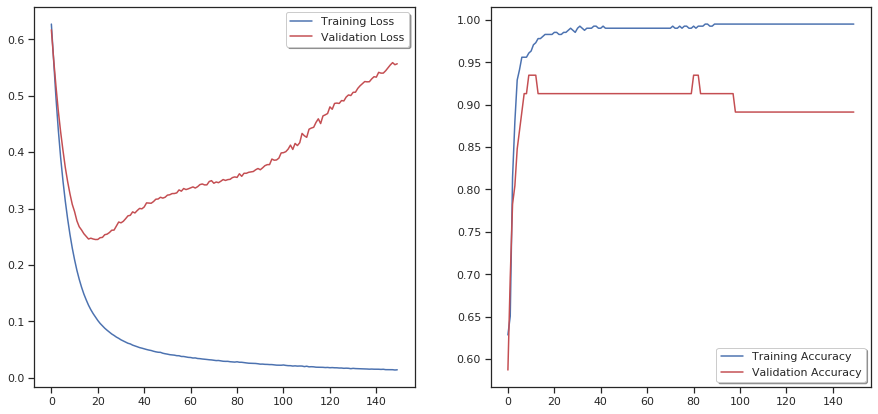

In [35]:
plt.figure(figsize=(15,7))
ax1 = plt.subplot(1,2,1)
ax1.plot(history.history['loss'], color='b', label='Training Loss') 
ax1.plot(history.history['val_loss'], color='r', label = 'Validation Loss',axes=ax1)
legend = ax1.legend(loc='best', shadow=True)
ax2 = plt.subplot(1,2,2)
ax2.plot(history.history['accuracy'], color='b', label='Training Accuracy') 
ax2.plot(history.history['val_accuracy'], color='r', label = 'Validation Accuracy')
legend = ax2.legend(loc='best', shadow=True)

In [36]:
evaluation = model.evaluate(X_test,Y_test)

4/4 [==============================] - 0s 927us/step - loss: 0.0818 - accuracy: 0.9825


In [37]:
print("Accuracy: %.1f" % (evaluation[1]*100))
print("Loss: %.1f" % (evaluation[0]*100))

Accuracy: 98.2
Loss: 8.2


In [38]:
#Prediction
Y_pred = model.predict(X)
for i in range(20):
    print(Y_pred[i])

[0.00228096 0.997719  ]
[0.00243356 0.99756646]
[0.00228882 0.9977112 ]
[0.00318915 0.99681085]
[0.00253829 0.9974617 ]
[0.0057047 0.9942953]
[0.00232927 0.9976707 ]
[0.01050956 0.98949045]
[0.00246149 0.99753857]
[0.00238841 0.99761164]
[0.01650396 0.98349607]
[0.00266114 0.99733883]
[0.00987392 0.99012613]
[0.5416195  0.45838058]
[0.00460467 0.99539536]
[0.00231641 0.9976835 ]
[0.00272336 0.9972766 ]
[0.00230855 0.9976915 ]
[0.00228033 0.9977196 ]
[0.998494   0.00150595]


In [39]:
#Pour table de confusion
Y_test_class = np.argmax(Y_onehot,axis=1)
Y_pred_class = np.argmax(Y_pred,axis=1)

In [40]:
Y_test_class

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

In [41]:
Y_pred_class

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

In [42]:
print(classification_report(Y_test_class,Y_pred_class))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       357
           1       0.99      0.97      0.98       212

    accuracy                           0.98       569
   macro avg       0.99      0.98      0.98       569
weighted avg       0.98      0.98      0.98       569



In [43]:
print(confusion_matrix(Y_test_class,Y_pred_class))

[[355   2]
 [  7 205]]


## Compilations et résultats sur données normalisées

In [44]:
#Définition du X normalisé
X = data_norm[['radius_mean', 'texture_mean', 'perimeter_mean','area_mean','smoothness_mean', 'compactness_mean',
          'concavity_mean','concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
          'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se',
          'concavity_se', 'concave_points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst',
          'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst',
          'concavity_worst', 'concave_points_worst', 'symmetry_worst', 'fractal_dimension_worst']].to_numpy()
X.shape

(569, 30)

In [45]:
#Définition du Y normalisé
Y = data_norm[['diagnosis']]
Y.shape

(569, 1)

In [46]:
#Encodage du Y
Y_encod = encoder.fit_transform(Y)
Y_onehot = np_utils.to_categorical(Y_encod)
Y_onehot.shape

(569, 2)

In [47]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y_onehot, test_size = 0.2, random_state=123)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(455, 30)
(114, 30)
(455, 2)
(114, 2)


In [48]:
model = Sequential()
model.add(Dense(10, input_dim=30, activation="sigmoid"))
model.add(Dense(4, activation="sigmoid"))
model.add(Dense(2,activation='softmax'))

In [49]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [50]:
history = model.fit(X_train, Y_train, epochs=150, batch_size=10,verbose=1, validation_split=0.1)

Epoch 1/150
41/41 [==============================] - 0s 3ms/step - loss: 0.6574 - accuracy: 0.5868 - val_loss: 0.6152 - val_accuracy: 0.8478
Epoch 2/150
41/41 [==============================] - 0s 974us/step - loss: 0.5578 - accuracy: 0.9291 - val_loss: 0.5611 - val_accuracy: 0.8478
Epoch 3/150
41/41 [==============================] - 0s 1ms/step - loss: 0.4957 - accuracy: 0.9315 - val_loss: 0.5220 - val_accuracy: 0.8478
Epoch 4/150
41/41 [==============================] - 0s 965us/step - loss: 0.4503 - accuracy: 0.9315 - val_loss: 0.4893 - val_accuracy: 0.8696
Epoch 5/150
41/41 [==============================] - 0s 1ms/step - loss: 0.4129 - accuracy: 0.9389 - val_loss: 0.4596 - val_accuracy: 0.8696
Epoch 6/150
41/41 [==============================] - 0s 947us/step - loss: 0.3792 - accuracy: 0.9462 - val_loss: 0.4320 - val_accuracy: 0.8913
Epoch 7/150
41/41 [==============================] - 0s 1ms/step - loss: 0.3484 - accuracy: 0.9535 - val_loss: 0.4046 - val_accuracy: 0.8913
Epoch 8

41/41 [==============================] - 0s 1ms/step - loss: 0.0388 - accuracy: 0.9927 - val_loss: 0.2982 - val_accuracy: 0.9130
Epoch 59/150
41/41 [==============================] - 0s 1ms/step - loss: 0.0386 - accuracy: 0.9902 - val_loss: 0.2990 - val_accuracy: 0.9130
Epoch 60/150
41/41 [==============================] - 0s 1ms/step - loss: 0.0385 - accuracy: 0.9902 - val_loss: 0.2988 - val_accuracy: 0.9130
Epoch 61/150
41/41 [==============================] - 0s 1ms/step - loss: 0.0375 - accuracy: 0.9902 - val_loss: 0.3021 - val_accuracy: 0.9130
Epoch 62/150
41/41 [==============================] - 0s 1ms/step - loss: 0.0374 - accuracy: 0.9927 - val_loss: 0.3034 - val_accuracy: 0.9130
Epoch 63/150
41/41 [==============================] - 0s 1ms/step - loss: 0.0365 - accuracy: 0.9902 - val_loss: 0.3046 - val_accuracy: 0.9130
Epoch 64/150
41/41 [==============================] - 0s 1ms/step - loss: 0.0358 - accuracy: 0.9902 - val_loss: 0.3041 - val_accuracy: 0.9130
Epoch 65/150
41/41 

41/41 [==============================] - 0s 948us/step - loss: 0.0177 - accuracy: 0.9976 - val_loss: 0.3999 - val_accuracy: 0.8913
Epoch 116/150
41/41 [==============================] - 0s 951us/step - loss: 0.0175 - accuracy: 0.9951 - val_loss: 0.4044 - val_accuracy: 0.8913
Epoch 117/150
41/41 [==============================] - 0s 967us/step - loss: 0.0173 - accuracy: 0.9951 - val_loss: 0.4100 - val_accuracy: 0.8913
Epoch 118/150
41/41 [==============================] - 0s 1ms/step - loss: 0.0170 - accuracy: 0.9976 - val_loss: 0.4074 - val_accuracy: 0.8913
Epoch 119/150
41/41 [==============================] - 0s 1ms/step - loss: 0.0168 - accuracy: 0.9951 - val_loss: 0.4147 - val_accuracy: 0.8913
Epoch 120/150
41/41 [==============================] - 0s 923us/step - loss: 0.0165 - accuracy: 0.9951 - val_loss: 0.4118 - val_accuracy: 0.8913
Epoch 121/150
41/41 [==============================] - 0s 1ms/step - loss: 0.0164 - accuracy: 0.9951 - val_loss: 0.4164 - val_accuracy: 0.8913
Epoch

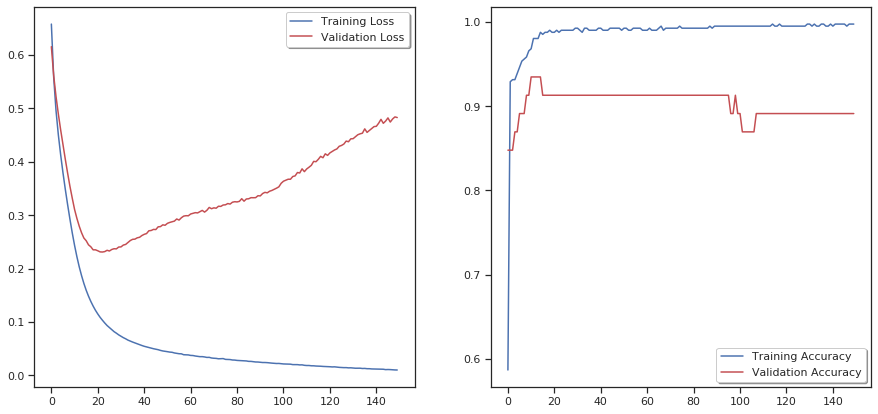

In [51]:
plt.figure(figsize=(15,7))
ax1 = plt.subplot(1,2,1)
ax1.plot(history.history['loss'], color='b', label='Training Loss') 
ax1.plot(history.history['val_loss'], color='r', label = 'Validation Loss',axes=ax1)
legend = ax1.legend(loc='best', shadow=True)
ax2 = plt.subplot(1,2,2)
ax2.plot(history.history['accuracy'], color='b', label='Training Accuracy') 
ax2.plot(history.history['val_accuracy'], color='r', label = 'Validation Accuracy')
legend = ax2.legend(loc='best', shadow=True)

In [52]:
Y_test_class = np.argmax(Y_onehot,axis=1)
Y_pred_class = np.argmax(Y_pred,axis=1)

In [53]:
print(classification_report(Y_test_class,Y_pred_class))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       357
           1       0.99      0.97      0.98       212

    accuracy                           0.98       569
   macro avg       0.99      0.98      0.98       569
weighted avg       0.98      0.98      0.98       569



In [54]:
print(confusion_matrix(Y_test_class,Y_pred_class))

[[355   2]
 [  7 205]]
